In [48]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean.cm as cmo 

# Triangular mesh tools
from scipy.spatial import Delaunay
import matplotlib.tri as tri
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

# Getting data

In [49]:
path1 ='../../../results_quadT/'
Quad1 = xr.open_dataset(path1 + 'main_output_ANT_00001.nc')

In [50]:
Hi1 = Quad1['Hi']       # Ice thickness
Va1 = Quad1['V']        # Coordinates of vertices
V1 = Va1.T
Tria1 = Quad1['Tri'] - 1  #Vertex boundary index 
#-> more info in Tijn's paper C. J. Berends et al.: The Utrecht Finite Volume Ice-Sheet Model (UFEMISM version) 2.0 – Part I appendic A
Tri1 = Tria1.T
triang1 = tri.Triangulation(V1[:, 0], V1[:, 1], Tri1) # Delaunay triangulation more info : https://matplotlib.org/stable/api/tri_api.html

In [51]:
voronois = []
for vi in range(0,len(Quad1.vi)):
    nVVor = Quad1.nVVor[vi].values
    VVor = Quad1.VVor[:nVVor,vi].values
    Vor = Quad1.Vor[:,VVor-1].values
    voronois.append(Polygon(Vor.T))


In [52]:
Quad1

<xarray.Dataset> Size: 53MB
Dimensions:                     (two: 2, vi: 26095, ci: 32, three: 3,
                                 ti: 51921, ei: 78015, four: 4, vori: 52192,
                                 bin: 11, time: 1, zeta: 12, month: 12,
                                 depth: 16)
Coordinates:
  * time                        (time) float64 8B 0.0
  * zeta                        (zeta) float64 96B 0.0 0.09091 ... 0.9091 1.0
  * month                       (month) int32 48B 1 2 3 4 5 6 7 8 9 10 11 12
  * depth                       (depth) float64 128B 0.0 100.0 ... 1.5e+03
Dimensions without coordinates: two, vi, ci, three, ti, ei, four, vori, bin
Data variables: (12/83)
    xmin                        float64 8B ...
    xmax                        float64 8B ...
    ymin                        float64 8B ...
    ymax                        float64 8B ...
    tol_dist                    float64 8B ...
    lambda_M                    float64 8B ...
    ...                          ...
    mask_margin                 (time, vi) int32 104kB ...
    mask_gl_gr                  (time, vi) int32 104kB ...
    mask_gl_fl                  (time, vi) int32 104kB ...
    mask_cf_gr                  (time, vi) int32 104kB ...
    mask_icefree_ocean          (time, vi) int32 104kB ...
    mask_floating_ice           (time, vi) int32 104kB ...
Attributes:
    git commit hash:  5654f268f06e02aa5a848cfcf3bf485f06adb301 (with uncommit...

# Example of ice height data on an unstructured mesh

## Triangles

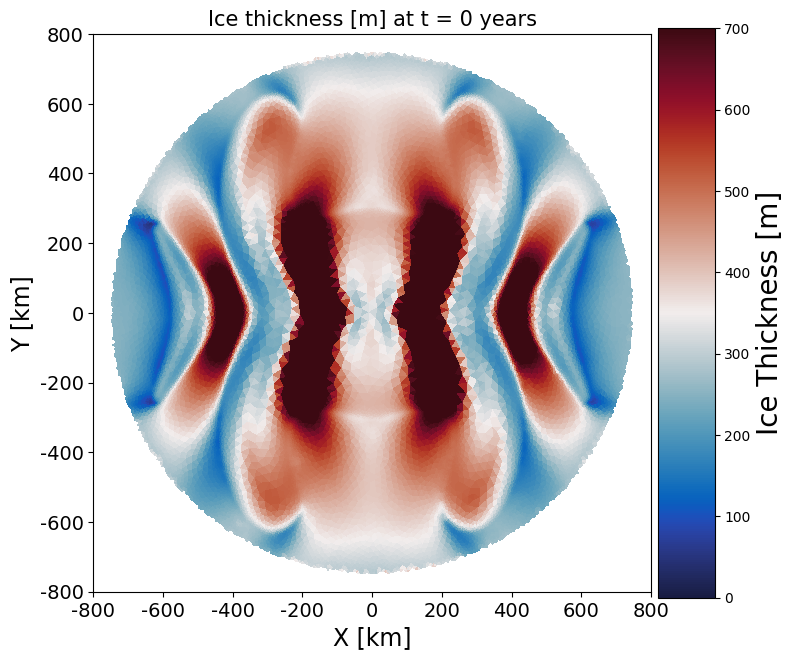

In [54]:
colorbar_kwargs = {
    'aspect': 10,
    'pad': 0.01,
    'shrink': 0.75, 
}

##############################################################################################################################
fig, ax = plt.subplots(1, 1, figsize=(8, 8)) 

c0 = ax.tripcolor(triang1, Hi1[0].where(Hi1[0]>0), cmap=cmo.balance, vmin = 0, vmax = 700)
cbar = fig.colorbar(c0, ax=ax, **colorbar_kwargs)
cbar.set_label("Ice Thickness [m]", fontsize= 20) 
ax.set_title('Ice thickness [m] at t = 0 years', fontsize= 15)

ax.set_xlabel('X [km]', fontsize=17)
ax.set_ylabel('Y [km]', fontsize=17)
n = 800000 
ax.set_xticks(np.arange(-n, n + 1, 200000))
ax.set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200), fontsize=14)
ax.set_yticks(np.arange(-n, n + 1, 200000))
ax.set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200), fontsize=14)
ax.set_xlim(-n, n)
ax.set_ylim(-n, n)
ax.set_aspect('equal')

plt.tight_layout()
plt.show()

## Voronois


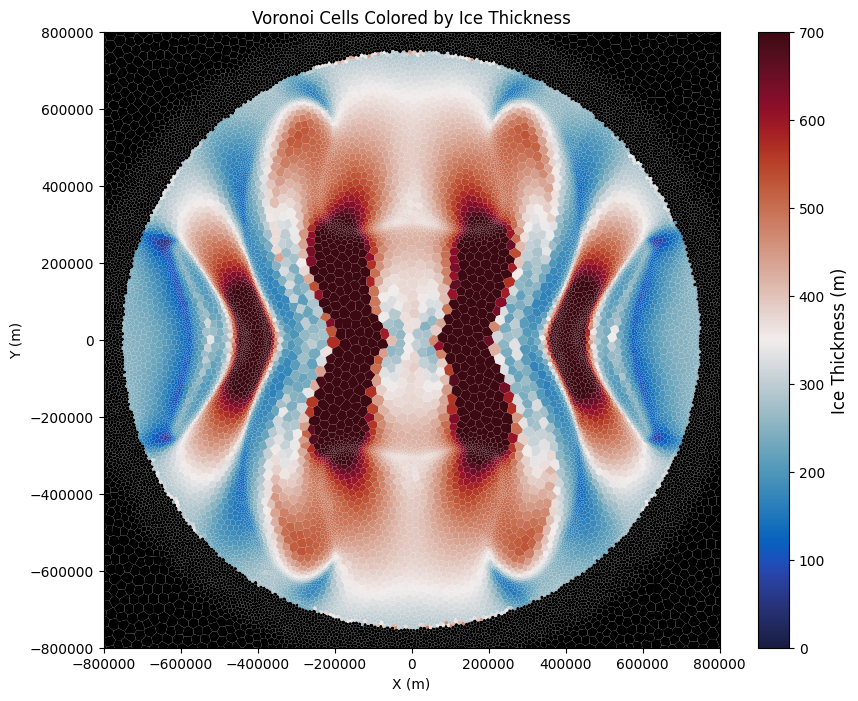

In [59]:

# Create a simple figure
fig, ax = plt.subplots(figsize=(10, 8))


# Create a colormap for thickness
# Choose a colormap (viridis, plasma, coolwarm, etc.)
cmap = cmo.balance
norm = plt.Normalize(vmin=0, vmax=700)

# Create facecolors based on thickness values
facecolors = cmap(norm(Hi1[0].where(Hi1[0]>0)))


# Create patch collection with thickness-based colors
pcoll = PatchCollection(voronois, edgecolor='white', linewidth=0.0, 
                       facecolor=facecolors, alpha=1)

# Add collection to axes
ax.add_collection(pcoll)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # This line is needed for colorbar
cbar = plt.colorbar(sm, ax=ax, shrink=1)
cbar.set_label('Ice Thickness (m)', fontsize=12)

# Set limits
ax.set_xlim(-n,n)
ax.set_ylim(-n,n)
ax.set_aspect('equal')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_title('Voronoi Cells Colored by Ice Thickness')

plt.show()

In [ ]:
Test = np.sum(A1*Hi1)/np.sum(A1.where(Hi1>0))
Test

### Transects 

In [43]:
ds_A1 = xr.open_dataset(path1+ 'transect_HalbraneA.nc')
Hb1A = ds_A1['Hb']
Hib1A = ds_A1['Hib']
Hs1A = ds_A1['Hs']
Hi1A = ds_A1['Hi']

xA = np.linspace(0,len(Hib1A[0]),len(Hib1A[1]))

/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_20663/3532830229.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(np.arange(-1500,1001,500), fontsize=17)


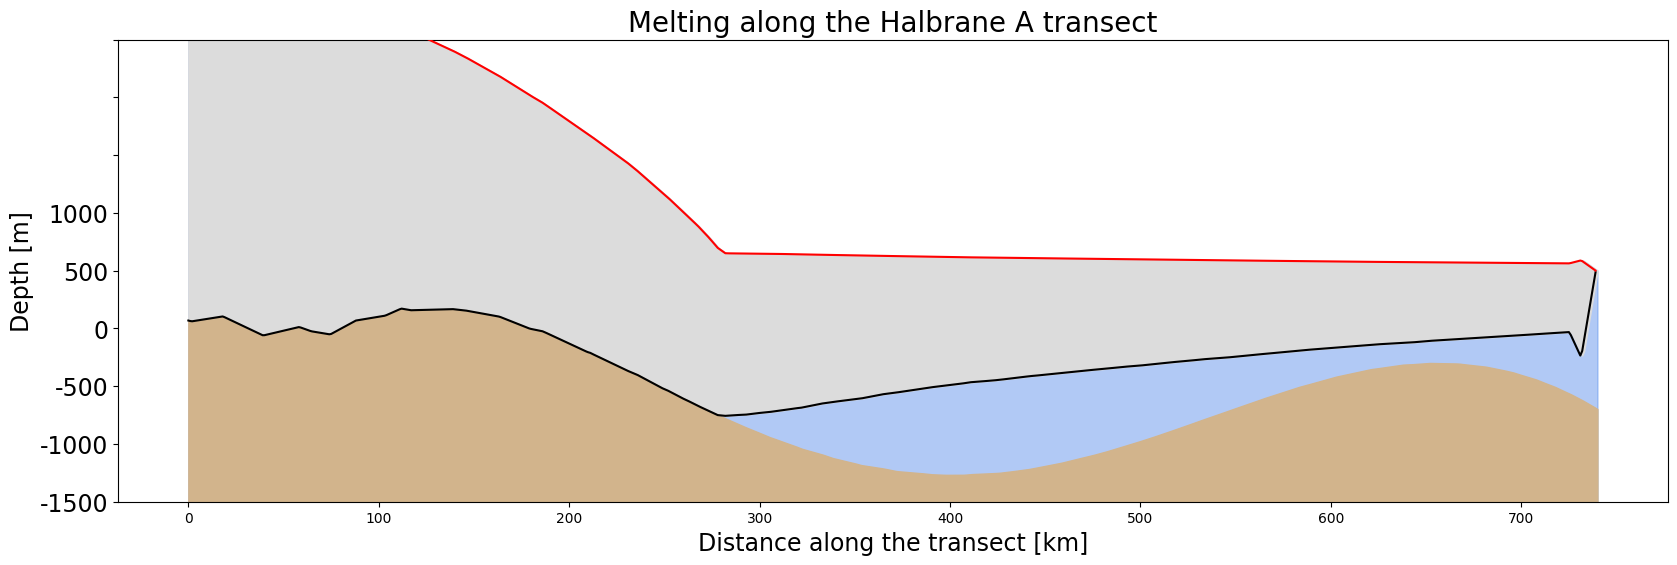

In [44]:
fig, ax = plt.subplots(figsize=(20, 6))

i = 0 
ax.plot(Hib1A[i], color='black', zorder=3) 
ax.plot(Hs1A[i], color='red', zorder=3) 


# Fill betweens and texts 
ax.fill_between(xA, Hs1A[i], Hib1A[i], color='gainsboro', alpha=1, zorder=2)  
ax.fill_between(xA, Hs1A[i], -1000 * np.ones(len(Hib1A[i])), color='cornflowerblue', alpha=0.5, zorder=1)  
ax.fill_between(xA, -2500 * np.ones(len(Hib1A[i])), Hb1A[i], color='tan', alpha=1, zorder = 2)


# Labels and titles
ax.set_xlabel('Distance along the transect [km]', fontsize=17)
#ax.set_xlim(0, 490)
#ax.set_xticks(np.arange(0, 491, 50))
#ax.set_xticklabels(np.arange(0, 491, 50) , fontsize=17)

ax.set_ylabel('Depth [m]', fontsize=17)
ax.set_ylim(-1000,1000)
ax.set_yticklabels(np.arange(-1500,1001,500), fontsize=17)

ax.set_title('Melting along the Halbrane A transect' , fontsize=20)

plt.show()
